In [7]:
import tqdm
import pandas as pd 
import numpy as np 
import os
from itertools import chain

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
img_labels_df = pd.read_csv('data/image_labels.csv')

img_labels_df.head()

,img_name,diagnosis,follow_up_num,patient_id,patient_age,patient_gender,view_position,original_width,original_height,original_x_spacing,original_y_spacing
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [35]:
all_diagnoses = set(chain(*img_labels_df['diagnosis'].map(lambda x: x.split('|')).tolist()))
for diagnosis in all_diagnoses:
    img_labels_df[diagnosis] = img_labels_df['diagnosis'].map(lambda diagnoses: diagnosis in diagnoses)

print(f"Dataframe Shape: {img_labels_df.shape}")
img_labels_df.head(10)

Dataframe Shape: (112120, 26)


,img_name,diagnosis,follow_up_num,patient_id,patient_age,patient_gender,view_position,original_width,original_height,original_x_spacing,...,Pleural_Thickening,Edema,Infiltration,No Finding,Nodule,Cardiomegaly,Effusion,Pneumonia,Mass,Emphysema
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,...,False,False,False,False,False,True,False,False,False,False
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,False,False,False,False,False,True,False,False,False,True
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,False,False,False,False,False,True,True,False,False,False
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,...,False,False,False,True,False,False,False,False,False,False
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,...,False,False,False,False,False,False,False,False,False,False
5,00000003_002.png,Hernia,1,3,75,F,PA,2048,2500,0.168,...,False,False,False,False,False,False,False,False,False,False
6,00000003_003.png,Hernia|Infiltration,2,3,76,F,PA,2698,2991,0.143,...,False,False,True,False,False,False,False,False,False,False
7,00000003_004.png,Hernia,3,3,77,F,PA,2500,2048,0.168,...,False,False,False,False,False,False,False,False,False,False
8,00000003_005.png,Hernia,4,3,78,F,PA,2686,2991,0.143,...,False,False,False,False,False,False,False,False,False,False
9,00000003_006.png,Hernia,5,3,79,F,PA,2992,2991,0.143,...,False,False,False,False,False,False,False,False,False,False


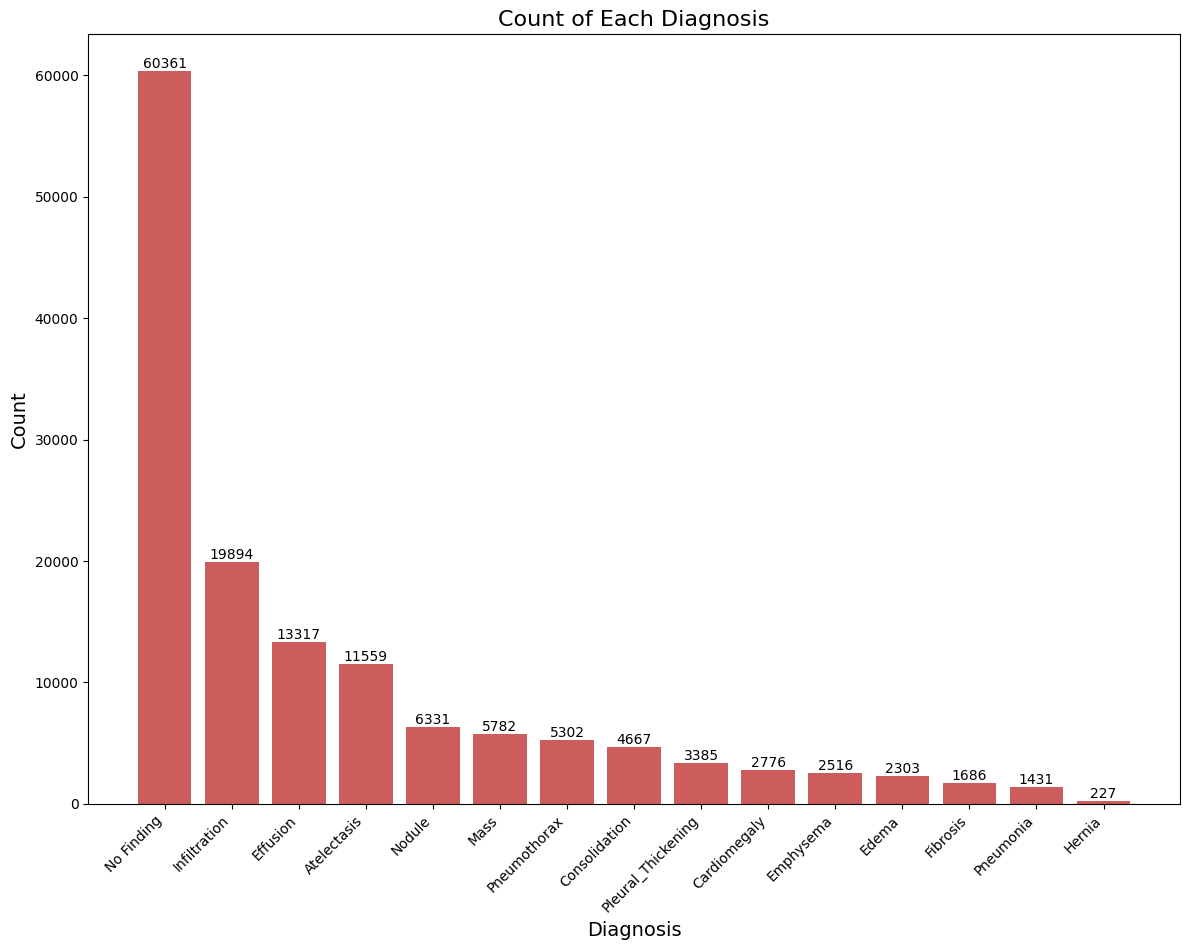

In [45]:
diagnosis_counts = {diagnosis: img_labels_df[diagnosis].sum() for diagnosis in all_diagnoses}
diagnosis_counts_df = pd.DataFrame(list(diagnosis_counts.items()), columns=['Diagnosis', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(12, 9.6))
bars = plt.bar(diagnosis_counts_df['Diagnosis'], diagnosis_counts_df['Count'], color='indianred')
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.title('Count of Each Diagnosis', fontsize=16)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom', ha='center', fontsize=10)
plt.tight_layout() 
plt.show()